# Graph-based image processing and analysis
**Master 2 GeoData Science**


## Introduction
The purpose of this lab is to experiment some graph-based tools for image processing that have been seen in Lecture (part 1). For this lab, we will work with the **Scikit-image** library.

Before starting, let mount your drive to allow Colab to acess to your Google Drive (for e.g., reading/writing images)

In [74]:
# Mount drive to allow Colab to access to your Google Drive
#from google.colab import drive
#drive.mount('/content/gdrive')


### **Exo 1: Compute the Adjacency matrix, Degree matrix and Laplacian Matrix from a given graph**

Read and show the *graph_exe.png* image from your Drive as follows:

In [75]:
!pip install scikit-image

/var/folders/60/bl70l_4s1976pvm1vdp3wz280000gn/T/ipykernel_61497/3320873816.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


Text(0.5, 1.0, 'A weighted graph')

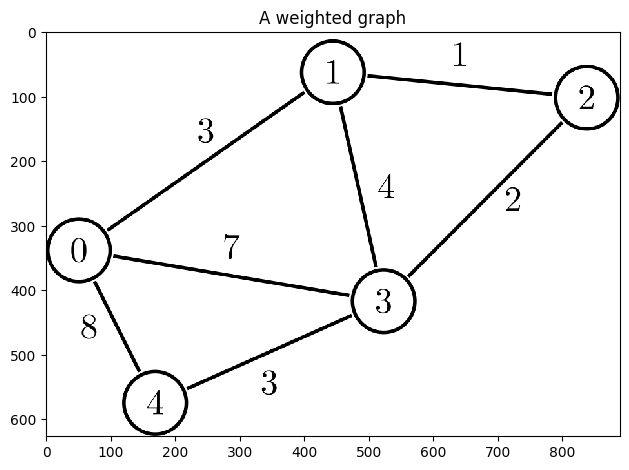

In [76]:
from skimage import io
import matplotlib.pyplot as plt


img = io.imread('graph_exe.png')
plt.figure(0)
io.imshow(img)
plt.title('A weighted graph')


1) Implement the adjacency matrix (W) using *numpy.array*




In [77]:
import numpy as np

W = np.array([
    [0,3,0,7,8],
    [3,0,1,4,0],
    [0,1,0,2,0],
    [7,4,2,0,3],
    [8,0,0,3,0]
    ])
print(W)


[[0 3 0 7 8]
 [3 0 1 4 0]
 [0 1 0 2 0]
 [7 4 2 0 3]
 [8 0 0 3 0]]


2) Now compute the Degree matrix (D) and the Laplacian matrix (L) from W

In [78]:
# Degree matrix D

D = np.array([
    [18,0,0,0,0],
    [0,8,0,0,0],
    [0,0,3,0,0],
    [0,0,0,16,0],
    [0,0,0,0,11]
    ])
print(D)


# print(D)

[[18  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 11]]


In [79]:
# Laplacian matrix L
L = D - W
print(L)

[[18 -3  0 -7 -8]
 [-3  8 -1 -4  0]
 [ 0 -1  3 -2  0]
 [-7 -4 -2 16 -3]
 [-8  0  0 -3 11]]


### **Exo 2: Contruct a regular graph from an image**

Read and visualize the two following images
- img1: the *coffee* image from skimage data (need to import data package)
- img2: the *intersection94.jpg* image from your Drive


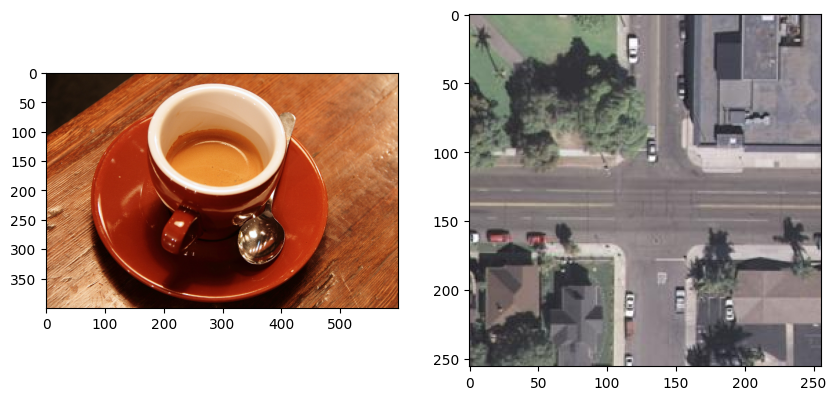

In [104]:
# Read img1 and img2
from skimage import data

img1 = data.coffee()

img2 = io.imread('intersection94.jpg')


# Show them side by side use subplot

plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)



Now, imagine we would like to construct a regular graph (4-connected) on each of the images (named *G1* and *G2*)

1) What are the number of nodes? number of edges of a graph contructed from an image of size NxM ?


In [81]:
# number of nodes = NxM
print(img1.shape) #each pixel is a node
N = img1.shape[0]
M = img1.shape[1]
nodes = N*M
print('Number of nodes in G1:', nodes)

# number of edges = (M-1)xN + (N-1)xM
edges_formula = (M - 1) * N + (N - 1) * M

print('Number of edges formula in G1:', edges_formula)


(400, 600, 3)
Number of nodes in G1: 240000
Number of edges formula in G1: 479000



2) Calculate the number of nodes and number of edges of G1 and G2.

In [82]:

#number of nodes

N_img2 = img2.shape[0]
M_img2 = img2.shape[1]
nodes_img2 = N_img2*M_img2

print('Number of nodes in G1:', nodes)
print('Number of nodes in G2:', nodes_img2)

#number of edges
edges_formula_img2 = ((M_img2 - 1) * N_img2) + ((N_img2 - 1) * M_img2)

print('Number of edges formula in G1:', edges_formula)
print('Number of edges in G2:', edges_formula_img2)

Number of nodes in G1: 240000
Number of nodes in G2: 65536
Number of edges formula in G1: 479000
Number of edges in G2: 130560


### **Exo 3: Now we would like to construct a region adjacency graph (RAG) from superpixels. Let's follow the tutorial.**

1) Perform SLIC super-pixel segmentation using the *segmentation.slic* method with parameters
- compactness 20
- number of segments 400

Required packages: *segmentation, color*

In [83]:
# Generate super-pixels

from skimage import segmentation, color

# labels_sp1 from img1
labels_sp1 = segmentation.slic(img1, compactness=20, n_segments=400)

# labels_sp2 from img2
labels_sp2 = segmentation.slic(img2, compactness=20, n_segments=400)



Print the number of super-pixels from each one using *np.unique*


In [84]:
# Print the number of super-pixels
print('Number of super-pixels in G1:', len(np.unique(labels_sp1)))
print('Number of super-pixels in G2:', len(np.unique(labels_sp2)))

Number of super-pixels in G1: 395
Number of super-pixels in G2: 381


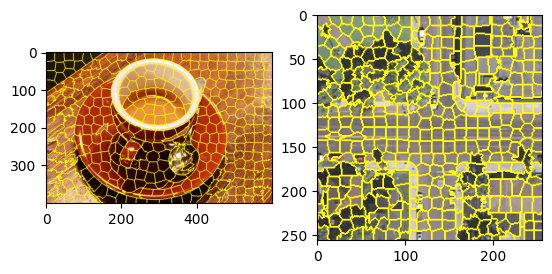

In [86]:
# visualize the super-pixels with *segmentation.mark_boundaries* and *color.label2rgb*

plt.figure(0)
plt.subplot(1,2,1)
plt.imshow(segmentation.mark_boundaries(img1, labels_sp1))
plt.subplot(1,2,2)
plt.imshow(segmentation.mark_boundaries(img2, labels_sp2))


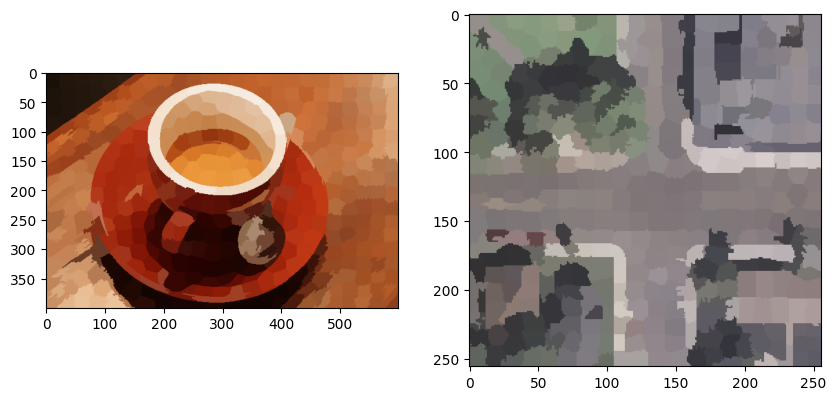

In [95]:
color_sp1 = color.label2rgb(labels_sp1, img1, kind='avg', bg_label=0)
color_sp2 = color.label2rgb(labels_sp2, img2, kind='avg', bg_label=0)

plt.figure(figsize=(10,12))
plt.subplot(1,2,1)
plt.imshow(color_sp1)
plt.subplot(1,2,2)
plt.imshow(color_sp2)


2) Construct a RAG based on the super-pixels using the *graph.rag_mean_color* method

Required packages: *graph*

In [96]:
# Graph construction from super-pixels
from skimage import graph

rag1 = graph.rag_mean_color(img1, labels_sp1, mode='similarity')
rag2 = graph.rag_mean_color(img2, labels_sp2, mode='similarity')


Print the number of nodes and number of edges from each graph. Your remarks?

In [98]:
# Number of nodes
nodes = rag1.number_of_nodes()
print('Number of nodes in G1:', nodes)
nodes = rag2.number_of_nodes()
print('Number of nodes in G2:', nodes)

# Number of edges
edges = rag1.number_of_edges()
print('Number of edges in G1:', edges)
edges = rag2.number_of_edges()
print('Number of edges in G2:', edges)



Number of nodes in G1: 395
Number of nodes in G2: 381
Number of edges in G1: 1110
Number of edges in G2: 1087


3) Perform Graph-cut algorithm (Normalized Cut) from the constructed graph using the *graph.cut_normalized* method

In [110]:
# Perform graph-cut

labels_gcut1 = graph.cut_normalized(rag=rag1, labels=labels_sp1)
labels_gcut2 = graph.cut_normalized(rag=rag2, labels=labels_sp2)

Visualize the segmentation results

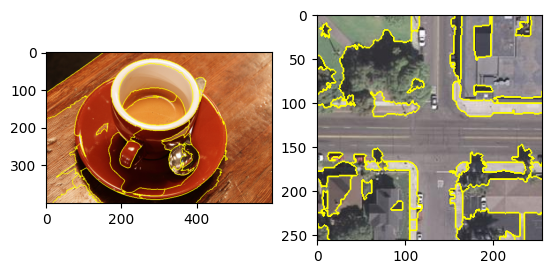

In [112]:
# visualization the segmentation results

plt.figure(0)
plt.subplot(1,2,1)
plt.imshow(segmentation.mark_boundaries(img1, labels_gcut1))
plt.subplot(1,2,2)
plt.imshow(segmentation.mark_boundaries(img2, labels_gcut2))


/var/folders/60/bl70l_4s1976pvm1vdp3wz280000gn/T/ipykernel_61497/1930920689.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img_in)
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs
/var/folders/60/bl70l_4s1976pvm1vdp3wz280000gn/T/ipykernel_61497/1930920689.py:12: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow

Text(0.5, 1.0, 'segmentation result')

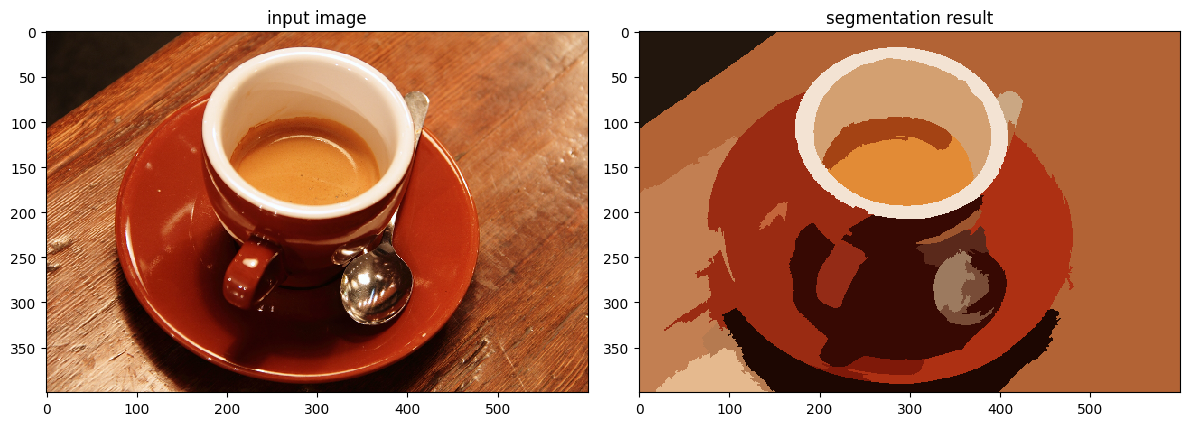

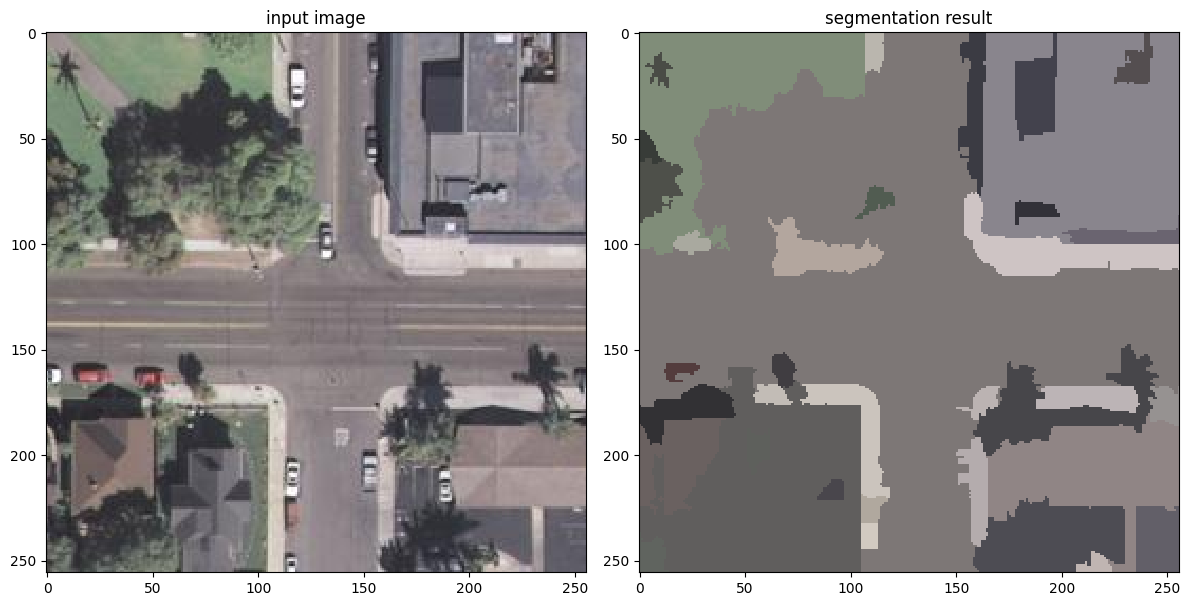

In [114]:
img_in = img1
labels_in = labels_gcut1

img_out = color.label2rgb(labels_in, img_in, kind='avg', bg_label=0)

plt.figure(figsize = (12,16))
plt.subplot(121)
io.imshow(img_in)
plt.title("input image")

plt.subplot(122)
io.imshow(img_out)
plt.title("segmentation result")

img_out2 = color.label2rgb(labels_gcut2, img2, kind='avg', bg_label=0)

plt.figure(figsize = (12,16))
plt.subplot(121)
io.imshow(img2)
plt.title("input image")

plt.subplot(122)
io.imshow(img_out2)
plt.title("segmentation result")




What are the number of segments from each segmented image?


In [113]:
# your response
print('Number of segments in G1:', len(np.unique(labels_gcut1)))
print('Number of segments in G2:', len(np.unique(labels_gcut2)))


Number of segments in G1: 21
Number of segments in G2: 37
